In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
dataset = pd.read_csv('/content/clustered dataset.csv')

In [44]:
dataset.head()

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,3,1,1,19,15,39
1,1,3,2,1,21,15,81
2,2,3,3,0,20,16,6
3,3,3,4,0,23,16,77
4,4,3,5,0,31,17,40


In [45]:
dataset['Gender'] = dataset['Gender'].map({'Female': '0', 'Male': '1'})
dataset.head()

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,3,1,NaN,19,15,39
1,1,3,2,NaN,21,15,81
2,2,3,3,NaN,20,16,6
3,3,3,4,NaN,23,16,77
4,4,3,5,NaN,31,17,40


In [46]:
dataset.shape

(200, 7)

In [47]:
dataset.columns

Index(['Unnamed: 0', 'Cluster_numbers', 'CustomerID', 'Gender', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              200 non-null    int64 
 1   Cluster_numbers         200 non-null    int64 
 2   CustomerID              200 non-null    int64 
 3   Gender                  0 non-null      object
 4   Age                     200 non-null    int64 
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.1+ KB


In [49]:
dataset.select_dtypes(include = ['int64', 'float64']).columns

Index(['Unnamed: 0', 'Cluster_numbers', 'CustomerID', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [50]:
dataset.describe()

,Unnamed: 0,Cluster_numbers,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,2.160000,100.500000,38.850000,60.560000,50.200000
std,57.879185,1.397917,57.879185,13.969007,26.264721,25.823522
min,0.000000,0.000000,1.000000,18.000000,15.000000,1.000000
25%,49.750000,1.000000,50.750000,28.750000,41.500000,34.750000
50%,99.500000,2.000000,100.500000,36.000000,61.500000,50.000000
75%,149.250000,3.000000,150.250000,49.000000,78.000000,73.000000
max,199.000000,4.000000,200.000000,70.000000,137.000000,99.000000


In [51]:
dataset.isnull().values.any()

True

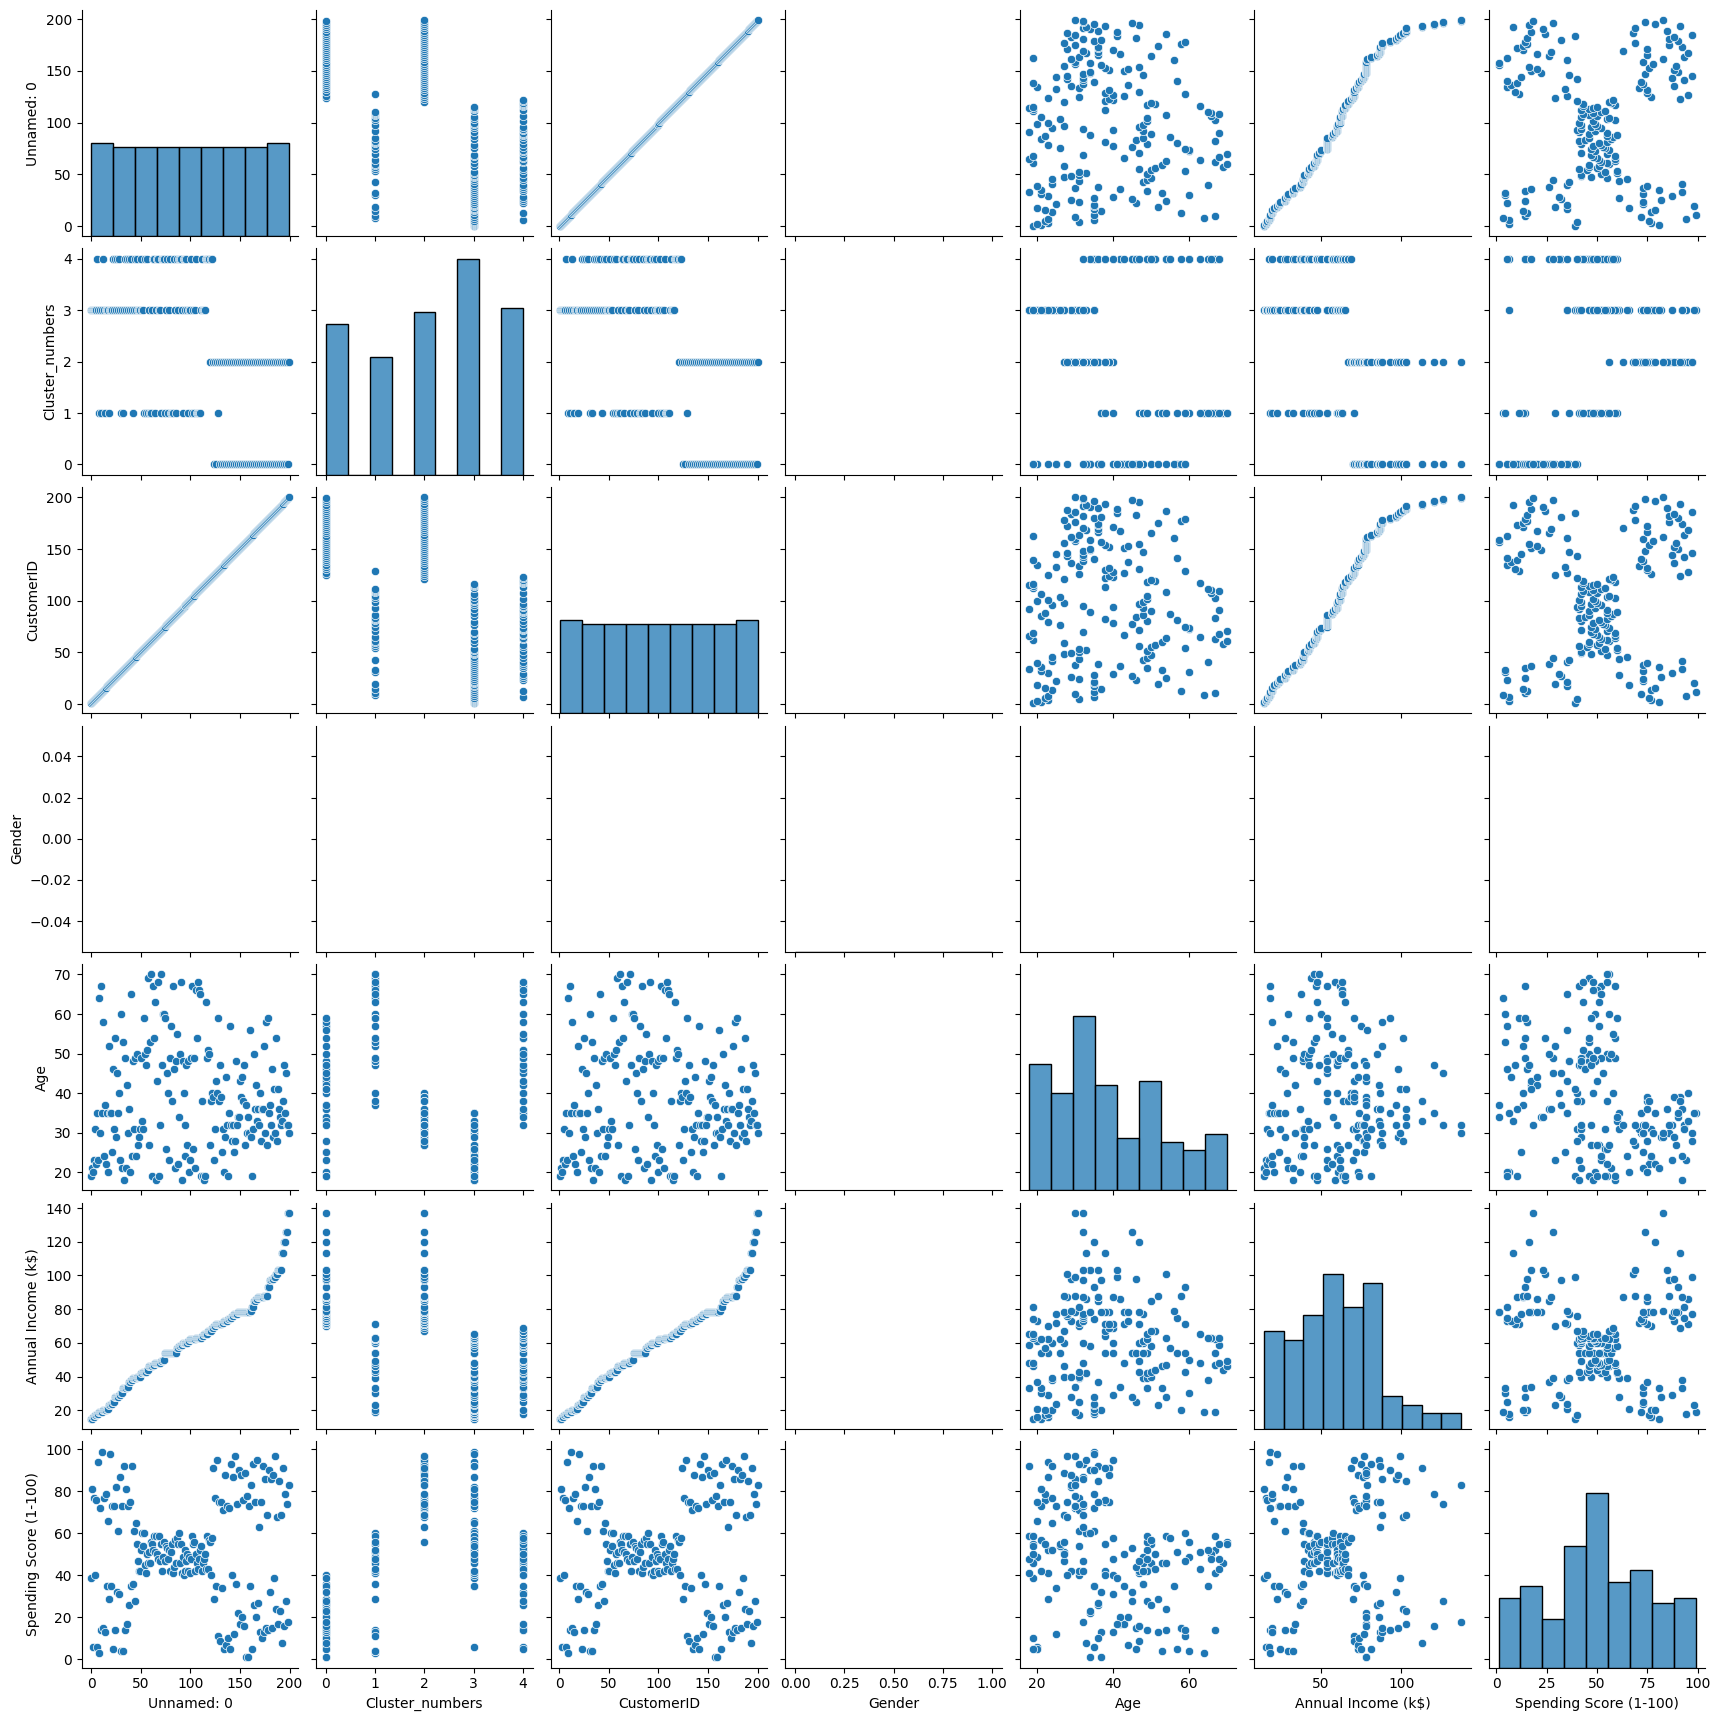

In [52]:
import seaborn as sns
sns.pairplot(dataset)

In [53]:
dataset.head()

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,3,1,NaN,19,15,39
1,1,3,2,NaN,21,15,81
2,2,3,3,NaN,20,16,6
3,3,3,4,NaN,23,16,77
4,4,3,5,NaN,31,17,40


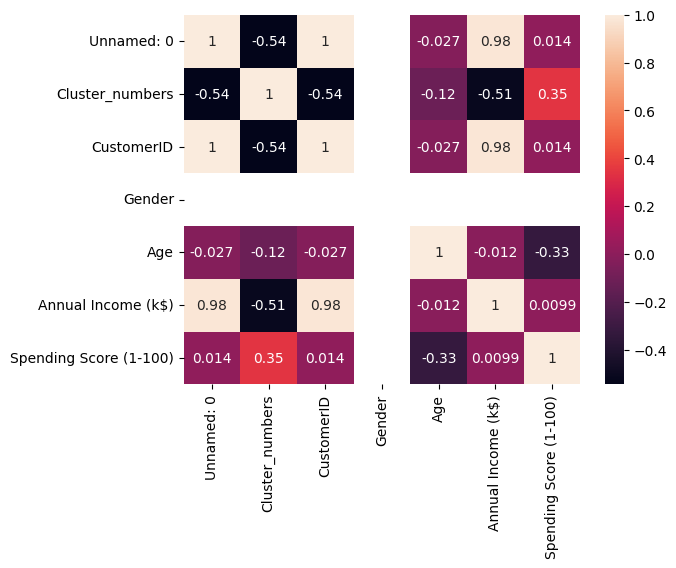

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [55]:
dataframe = dataset

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [57]:
dataset

array([[-1.7234121 ,  0.6024021 , -1.7234121 , ..., -1.42456879,
        -1.73899919, -0.43480148],
       [-1.70609137,  0.6024021 , -1.70609137, ..., -1.28103541,
        -1.73899919,  1.19570407],
       [-1.68877065,  0.6024021 , -1.68877065, ..., -1.3528021 ,
        -1.70082976, -1.71591298],
       ...,
       [ 1.68877065, -0.11474326,  1.68877065, ..., -0.49160182,
         2.49780745,  0.92395314],
       [ 1.70609137, -1.54903398,  1.70609137, ..., -0.49160182,
         2.91767117, -1.25005425],
       [ 1.7234121 , -0.11474326,  1.7234121 , ..., -0.6351352 ,
         2.91767117,  1.27334719]])

In [58]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

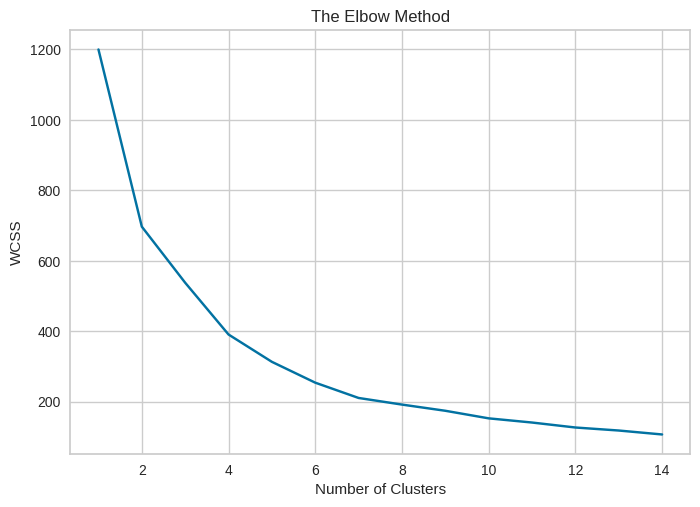

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'dataset' is a pandas DataFrame
imputer = SimpleImputer(strategy='mean')
dataset_imputed = imputer.fit_transform(dataset)

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataset_imputed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


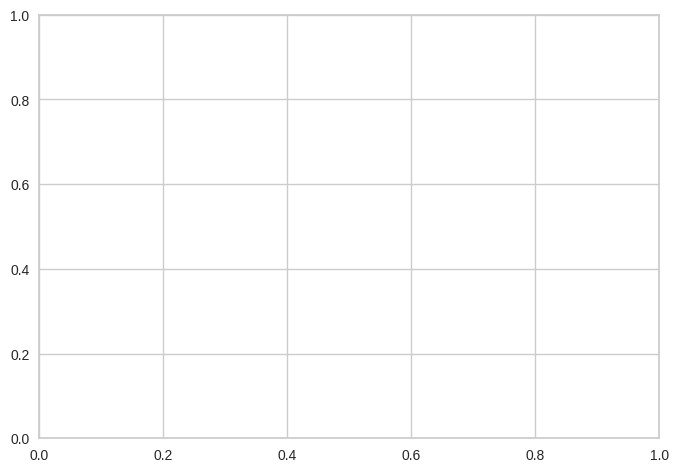

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'dataset' is a pandas DataFrame or a NumPy array
imputer = SimpleImputer(strategy='mean') # Create an imputer to fill missing values with the mean
dataset_imputed = imputer.fit_transform(dataset) # Impute missing values in the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(dataset_imputed) # Fit KMeans

In [68]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 4, 2, 0, 2, 0, 2, 4, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 0, 4, 0, 4, 0, 2, 0, 0, 2, 4, 4, 0, 2,
       4, 4, 2, 2, 0, 4, 4, 4, 0, 2, 4, 0, 2, 4, 0, 0, 0, 4, 2, 0, 4, 2,
       4, 4, 4, 2, 0, 4, 4, 2, 4, 2, 0, 2, 2, 4, 0, 2, 0, 2, 4, 0, 0, 0,
       0, 2, 4, 2, 2, 2, 4, 4, 4, 4, 1, 4, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [69]:
y_kmeans = y_kmeans.reshape(len(y_kmeans), 1)

In [70]:
bx = np.concatenate((y_kmeans, dataframe), axis = 1)

In [71]:
dataframe.columns

Index(['Unnamed: 0', 'Cluster_numbers', 'CustomerID', 'Gender', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [73]:
# Assuming 'dataframe' has the columns 'CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)' and two more columns
dataframe_final = pd.DataFrame(data = bx, columns = ['Cluster_numbers','CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Extra Column 1', 'Extra Column 2'])

In [74]:
dataframe_final.head()

,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Extra Column 1,Extra Column 2
0,2,0,3,1,NaN,19,15,39
1,2,1,3,2,NaN,21,15,81
2,2,2,3,3,NaN,20,16,6
3,2,3,3,4,NaN,23,16,77
4,2,4,3,5,NaN,31,17,40


In [75]:
dataframe_final.to_csv('clustered dataset')